In [1]:
from scipy import optimize,arange
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We define our objective function

In [2]:
def u2(w,e):
    return w-0.5*e-abs(5*e/4-w)

We define the optimization procedure

In [3]:
def optimal(w):
    e = optimize.fminbound(lambda x: -u2(w,x),0,1,full_output=1)
    return e[0]

In [4]:
range_w = arange(0,1.1,0.01)

In [5]:
def optimal1():
    return [optimal(w) for w in range_w]

In [6]:
df = pd.DataFrame({'e':optimal1()},index=range_w)

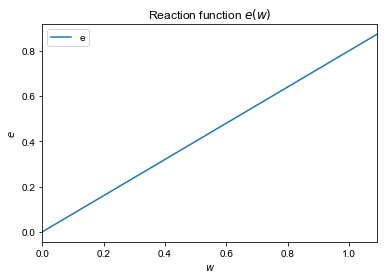

In [7]:
df.plot()
plt.style.use('seaborn')
plt.xlabel('$w$')
plt.ylabel('$e$')
plt.title('Reaction function $e(w)$')
plt.show()

In [8]:
def u1d(a,b,e,w):
    return 2*e-w-a*max((2*w-5*e/2),0)-b*max((5*e/2-2*w),0)

In [9]:
def u2d(a,b,e,w):
    return w-e/2-a*max((5*e/2-2*w),0)-b*max((2*w-5*e/2),0)

In [10]:
def reaction1(a,b,e):
    w = optimize.fminbound(lambda x: -u1d(a,b,e,x),0,1,full_output=1)
    return w[0]

In [11]:
def reaction2(a,b,w):
    e = optimize.fminbound(lambda x: -u2d(a,b,x,w),0,1,full_output=1)
    return e[0]

In [12]:
def reaction_1(a,b):
    w = optimize.fminbound(lambda x: -u1d(a,b,reaction2(a,b,x),x),0,1,full_output=1)
    return w[0]

In [16]:
def optimal_1():
    return [reaction_1(0,b) for b in range_w]

In [17]:
df1 = pd.DataFrame({'u1':optimal_1()},index=range_w)

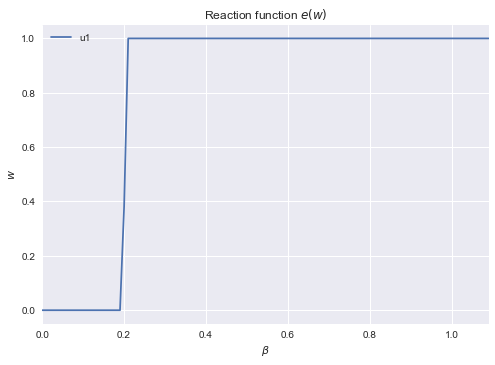

In [18]:
plt.clf()
df1.plot()
plt.style.use('seaborn')
plt.xlabel('$\\beta$')
plt.ylabel('$w$')
plt.title('Reaction function $e(w)$')
plt.show()